# Анализ игровых платформ

### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных games.csv

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. Открытие файла с данными и изучение общей информации

Путь к файлу: /datasets/games.csv

### Шаг 2. Подготовка данных

* Заменить названия столбцов (привести к нижнему регистру).
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.
* Обработать пропуски при необходимости.
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать.
* Описать причины, которые могли привести к пропускам.
* Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Пояснить, как обработать это значение.
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Шаг 3. Провести исследовательский анализ данных

* Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Найти популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
* Определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
* Далее работать только с данными, которые определили. Не учитывать данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы и соотнести их с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Описать различия в долях продаж.
* Самые популярные жанры (топ-5). Пояснить разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проведите исследование статистических показателей

Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

### Шаг 6. Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Задать самостоятельно пороговое значение alpha.
Пояснить:
* Как сформулирована нулевую и альтернативную гипотезы.
* Какой критерий применен для проверки гипотез и почему.

### Шаг 7. Написать общий вывод

# 1. Открытие файла и получение общей информации

In [1]:
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
import scipy
# импорт библиотеки warnings
import warnings
warnings.filterwarnings("ignore")
# чтение файла
games=pd.read_csv('games.csv')
# просмотр общей информации о датасете
games.info()
# вывод на экран датасета
display(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN



В таблице почти нет пропусков данных в данных о названиях платформ, игр и продажах, и достаточно много пропусков в столбцах оценок и рейтинга. Возможно, эти пропуски не случайны.

# 2. Подготовка данных

<AxesSubplot:>

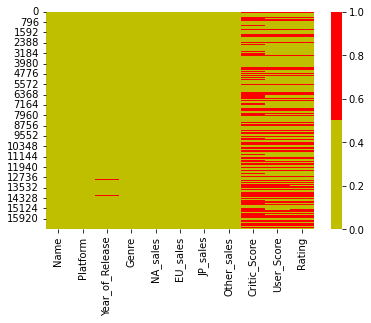

In [2]:
colours = ['y', 'r'] 
sns.heatmap(games.isnull(), cmap=sns.color_palette(colours))


Данные пропущенны только в столбцах оценок и рейтинга, поэтому удалять строки с отсутствующими в них значениями не будем. Эти пропуски не случайны.

In [3]:
# переименование столбцов, перевод названий в нижний регистр
games.columns = games.columns.str.lower()
# просмотр уникальных значений столбца пользовательского рейтинга
print(games['user_score'].unique())
# просмотрены уникальные значения для столбца рейтинга, чтобы увидеть значение tbd из задания. Расшифровка звучит как "to be detirmined", или "будет определено"
# заменяем формат столбца user_score на числовой, а столбец year_of_release на дату
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')
# заменим пропущенные значения в столбце rating - на пустую строку
games['rating'] = games['rating'].fillna(value='')
games['year_of_release'] = games['year_of_release'].fillna(2045) 
#2045 год - год действий в фильме "Первому игроку приготовиться"
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = games['year_of_release'].astype('str')
games['sample_date'] = '-01-01'
games['year_of_release'] = games['year_of_release'] + games['sample_date']
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y-%m-%d').dt.year
del games['sample_date']
games.head()
# удаляем дубликаты
games.drop_duplicates().reset_index(drop=True)
# удаление строк с пропущенными значениями не было выполнено, т.к. пропущены значения только в столбцах рейтинга и оценок пользователей и критиков, при обработке зависимостей в данных столбцах данный факт будет учтен.
# подсчет суммарных продаж во всех регионах, формирование отдельного столбца
games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
# вывод на экран преобразованного дата сета
display(games)

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,,0.01


Данные для дальнейшего анализа обработаны.

In [4]:
#Подсчет количества выпускаемых игр в разные годы
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2045     269
Name: name, dtype: int64


Количество выпускаемых игр с 1980(9 игр) по 2008(1427 игр) увеличивалось, с 2009(1426 игр) - пошло на спад(в 2016 - 502 игры).

# 3. Исследовательский анализ данных

In [5]:
# сортировка столбца платформ по количеству суммарных продаж

games.groupby(by='platform').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head()


,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Наиболее популярны платформы: PS2,  X360, PS3, Wii, DS.

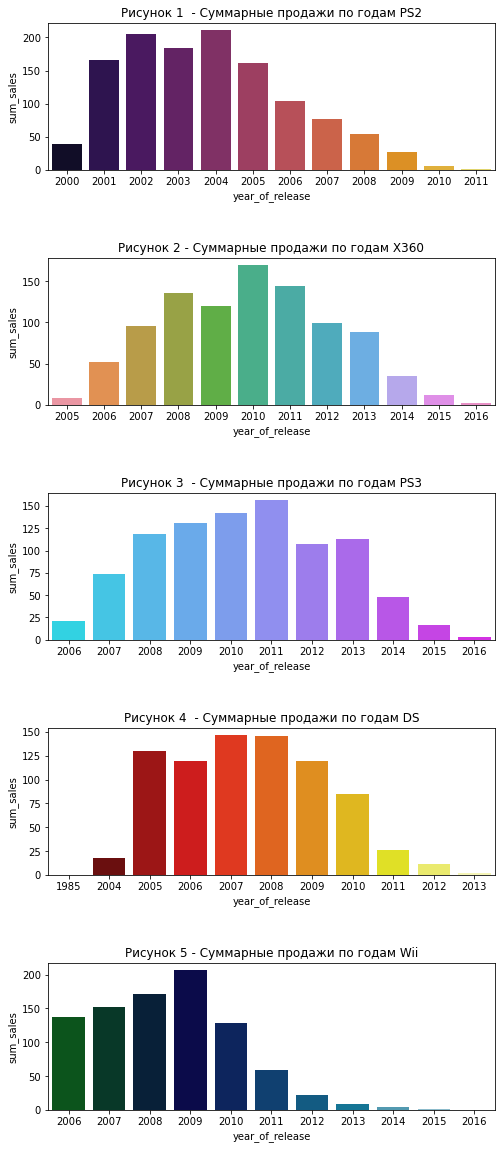

In [6]:
fig,ax = plt.subplots(5,1,figsize=(8,20))
ax1,ax2,ax3,ax4,ax5 = ax.flatten()

cnt=games.query('platform=="PS2"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 1  - Суммарные продажи по годам PS2')


cnt=games.query('platform=="X360"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],ax=ax2)
ax2.set_title('Рисунок 2 - Суммарные продажи по годам X360')


cnt=games.query('platform=="PS3"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'cool',ax=ax3)
ax3.set_title('Рисунок 3  - Суммарные продажи по годам PS3')


cnt=games.query('platform=="DS"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'hot',ax=ax4)
ax4.set_title('Рисунок 4  - Суммарные продажи по годам DS')


cnt=games.query('platform=="Wii"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'ocean',ax=ax5)
ax5.set_title('Рисунок 5 - Суммарные продажи по годам Wii')
plt.subplots_adjust(wspace=0.6, hspace=0.6)

In [7]:
#1
ps2=games.query('platform=="PS2"and year_of_release!=2045')
ps2_min=ps2['year_of_release'].min()
ps2_max=ps2['year_of_release'].max()
ps2_diff=ps2_max-ps2_min
#2
x360=games.query('platform=="X360"and year_of_release!=2045')
x360_min=x360['year_of_release'].min()
x360_max=x360['year_of_release'].max()
x360_diff=x360_max-x360_min
#3
ps3=games.query('platform=="PS3"and year_of_release!=2045')
ps3_min=ps3['year_of_release'].min()
ps3_max=ps3['year_of_release'].max()
ps3_diff=ps3_max-ps3_min
#4
ds=games.query('platform=="DS"and year_of_release!=2045')
ds_min=ds['year_of_release'].min()
ds_max=ds['year_of_release'].max()
ds_diff=ds_max-ds_min
#5
wii=games.query('platform=="Wii"and year_of_release!=2045')
wii_min=wii['year_of_release'].min()
wii_max=wii['year_of_release'].max()
wii_diff=wii_max-wii_min
mean=(ps2_diff+x360_diff+ps3_diff+ds_diff+wii_diff)/5
print('Среднее время жизни платформы: ',mean, 'лет.')

Среднее время жизни платформы:  14.0 лет.


Видим, что пятерка самых популярных платформ набрала свою популярность с начала 2000-х. Период от первых продаж до исчезнования продаж в среднем занимает  14 лет.

Посмотрим самые популярные платформы с 1980 до 2000 года

Text(0.5, 1.0, 'Рисунок 6 - Популярность платформ в зависимости с 1980 до 2000')

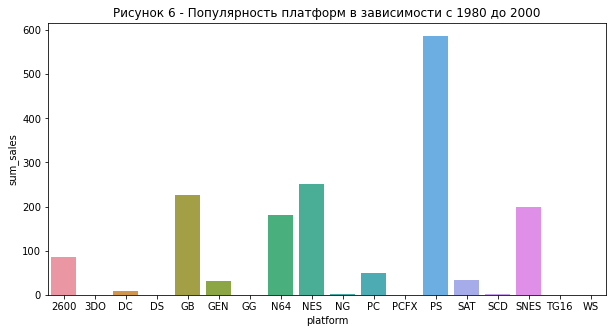

In [8]:
# самые популярные платформы с 1980 до 2000 года
plt.figure(figsize=(10,5))
cnt=games.query('year_of_release<2000').pivot_table(index='platform', 
                                                    values='sum_sales',
                                                       aggfunc=sum)#.plot(grid=True, kind='bar',figsize=(10, 5))
sns.barplot(x = cnt.index,y=cnt['sum_sales'])

plt.title('Рисунок 6 - Популярность платформ в зависимости с 1980 до 2000')


Похоже, что самые популярные платформы в период с 1980 до 2000: PS, NES, GB, SNES, N64.

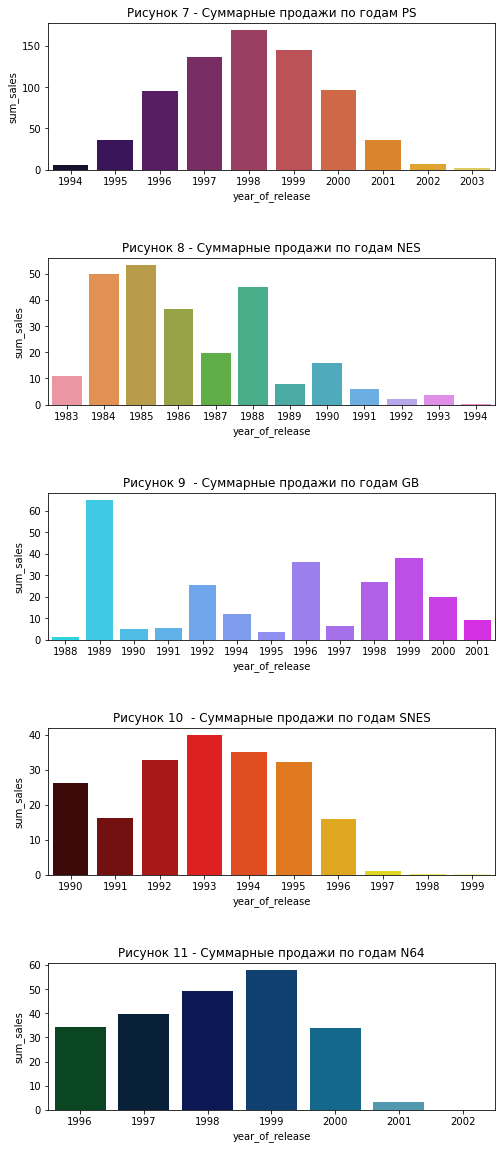

In [9]:
# выведем графики по самым популярным платформам в период с 1980 до 2000
fig,ax = plt.subplots(5,1,figsize=(8,20))
ax1,ax2,ax3,ax4,ax5 = ax.flatten()

cnt=games.query('platform=="PS"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 7 - Суммарные продажи по годам PS')


cnt=games.query('platform=="NES"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],ax=ax2)
ax2.set_title('Рисунок 8 - Суммарные продажи по годам NES')


cnt=games.query('platform=="GB"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'cool',ax=ax3)
ax3.set_title('Рисунок 9  - Суммарные продажи по годам GB')


cnt=games.query('platform=="SNES"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'hot',ax=ax4)
ax4.set_title('Рисунок 10  - Суммарные продажи по годам SNES')


cnt=games.query('platform=="N64"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'ocean',ax=ax5)
ax5.set_title('Рисунок 11 - Суммарные продажи по годам N64')


plt.subplots_adjust(wspace=0.6, hspace=0.6)



In [10]:
#1
ps=games.query('platform=="PS"and year_of_release!=2045')
ps_min=ps['year_of_release'].min()
ps_max=ps['year_of_release'].max()
ps_diff=ps_max-ps_min
#2
nes=games.query('platform=="NES"and year_of_release!=2045')
nes_min=nes['year_of_release'].min()
nes_max=nes['year_of_release'].max()
nes_diff=nes_max-nes_min
#3
gb=games.query('platform=="GB"and year_of_release!=2045')
gb_min=gb['year_of_release'].min()
gb_max=gb['year_of_release'].max()
gb_diff=gb_max-gb_min
#4
snes=games.query('platform=="SNES"and year_of_release!=2045')
snes_min=snes['year_of_release'].min()
snes_max=snes['year_of_release'].max()
snes_diff=snes_max-snes_min
#5
n64=games.query('platform=="N64"and year_of_release!=2045')
n64_min=n64['year_of_release'].min()
n64_max=n64['year_of_release'].max()
n64_diff=wii_max-wii_min
mean=(ps_diff+nes_diff+gb_diff+snes_diff+n64_diff)/5
print('Среднее время жизни платформы: ',mean, 'лет.')

Среднее время жизни платформы:  10.4 лет.


По результатам вычислений видим,что период для появления платформы и выхода из нее с 1980 до 2000 меньше, чем для платформ с 2000 до 2016, и составляет 10,4 года. Платформа PS трансформировалась в PS2 и PS3. Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. SNES  95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB.

### Посмотрим как распределены продажи по годам:

Text(0, 0.5, 'Год релиза')

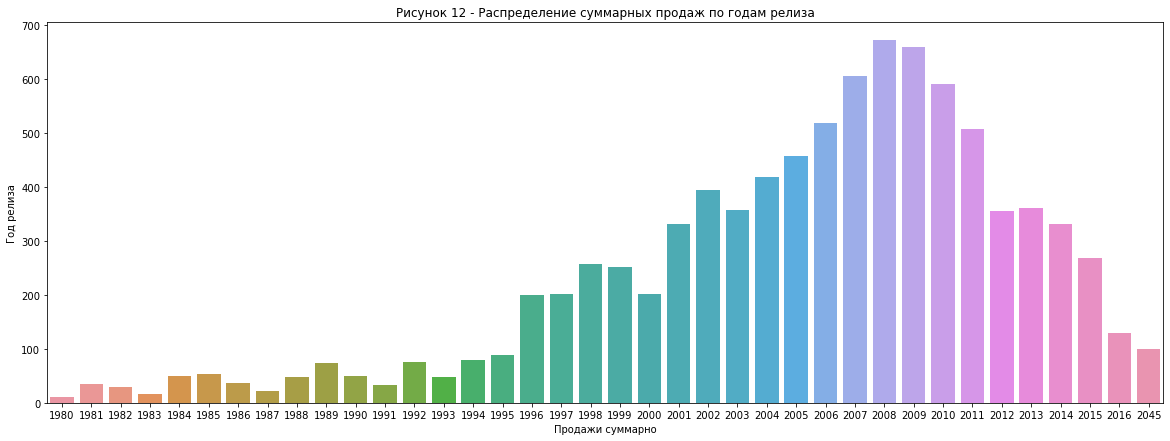

In [11]:
cnt=games.groupby('year_of_release')['sum_sales'].sum()
plt.figure(figsize=(20,7))
sns.barplot(x = cnt.index,y=cnt.values)
plt.title('Рисунок 12 - Распределение суммарных продаж по годам релиза')
plt.xlabel('Продажи суммарно')
plt.ylabel('Год релиза')




Количество продаж резко падает в 2016, возможно, это связано с тем, что данные за 2016 не заполнены до конца. Нормальным выглядит распределение продаж с 2003 по 2014, нужно избавиться от выбросов, чтобы убедиться в этом. А также выберем платформы с ненулевыми продажами за 2016 год, чтобы работать с ними в дальнейшем.

Избавимся от выбросов.

<AxesSubplot:title={'center':'Рисунок 13 - Боксплот - Распределение суммарных продаж'}>

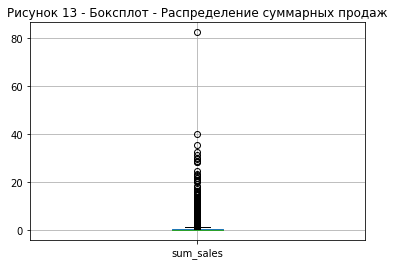

In [12]:
plt.title('Рисунок 13 - Боксплот - Распределение суммарных продаж')
games.boxplot(column=['sum_sales'])


Количество суммарных продаж более 80 является выбросом.

In [13]:
games_2016=games[(games.year_of_release==2016)&(games.sum_sales>0)]
games_2016['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

Как видно из выборки в 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.

In [14]:
# отбрасываем выбросы
games=games[(games.sum_sales < 80)]
# по гистограмме выбираем столбцы с нормальным распределением
games=games[(games.year_of_release > 2002) & (games.year_of_release < 2016)] 

In [15]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,12306.000000,12306.000000,12306.000000,12306.000000,12306.000000,6558.000000,6280.000000,12306.000000
mean,2008.605965,0.240423,0.142046,0.054311,0.052296,68.550168,7.068901,0.489077
std,3.275813,0.638966,0.468200,0.248666,0.196970,13.829596,1.494529,1.332203
min,2003.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.300000,0.050000
50%,2009.000000,0.080000,0.020000,0.000000,0.010000,70.000000,7.400000,0.150000
75%,2011.000000,0.230000,0.100000,0.030000,0.040000,79.000000,8.100000,0.440000
max,2015.000000,15.680000,12.760000,6.500000,10.570000,98.000000,9.700000,35.520000


Дальше работаем с данными только за период с 2003 по 2015.

Нормально распределены данные за период с 2003 по 2015 год, этот интервал используем в дальнейшей работе. Выборку платформ из 2016 сделали.

### Теперь разберемся в популярности игровых платформ, какие из них наиболее перспективные?

В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii. 
(вывод из предыдущего блока)

In [16]:
games['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS4', '3DS', 'GBA', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'PSV', 'PS', 'DC'], dtype=object)

В выбраном нами периоде с нормальным распределением существуют платформы: Wii, DS, X360, PS3, PS2, PS4, 3DS, GBA, XB, PC, PSP, XOne, WiiU, GC, PSV, PS, DC.
В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.
(вывод из предыдущего блока)
Из этого следует, что ни одну платформу при анализе мы не пропускаем, при отсечении данных за 2016 год.

In [17]:
# Исключим те платформы, которые уже были изучены: PS, PS2, PS3, X360, DS, Wii.
prognoz=games[(games.platform!='PS') & (games.platform!='PS2')& (games.platform!='PS3')& 
              (games.platform!='X360')& (games.platform!='DS')& (games.platform!='Wii')]
prognoz.head()              

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,,11.68


Построим графики для платформ PS4, 3DS, XOne, WiiU, PC, PSV, XB. Учтем, что в 2016 году существует платформа Х360, но в выбранных нами данных ее нет.

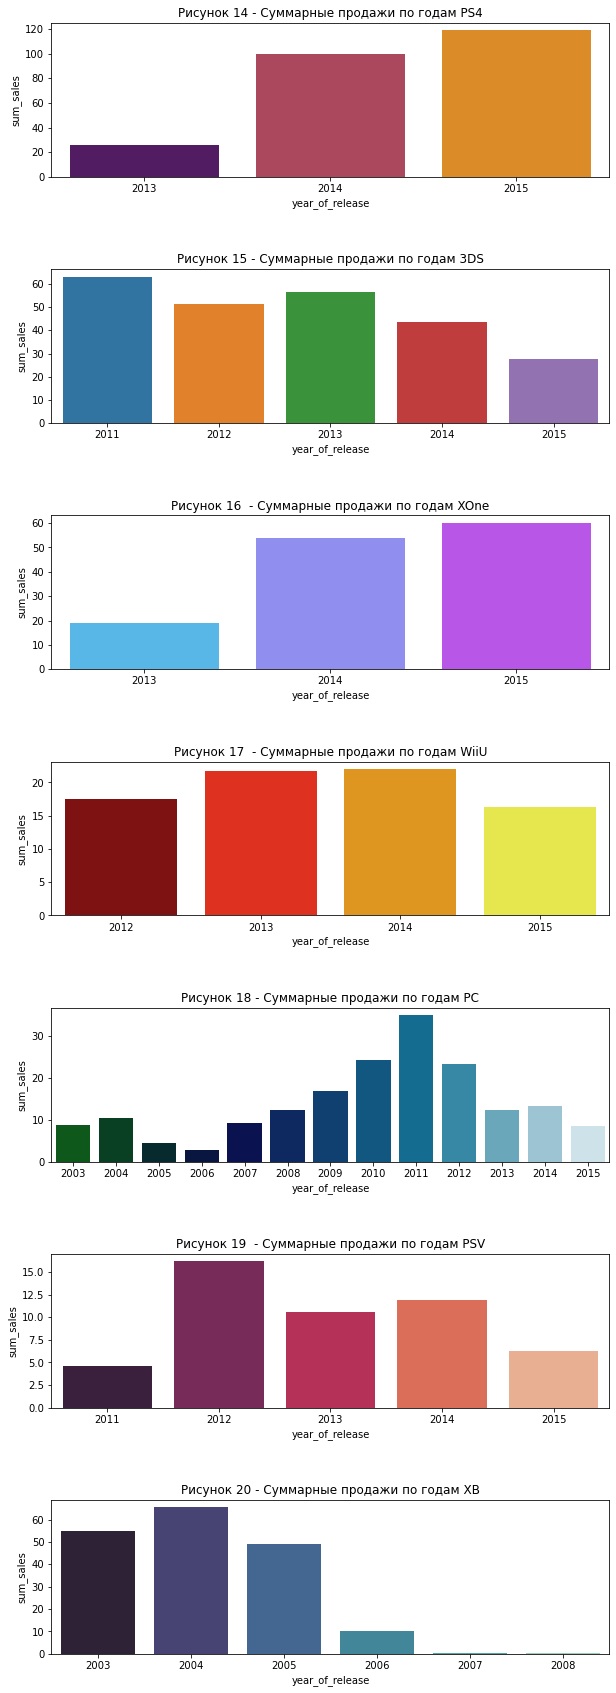

In [18]:
# выведем графики  PS4, 3DS, XOne, WiiU, PC, PSV, XB. 
fig,ax = plt.subplots(7,1,figsize=(10,30))
ax1,ax2,ax3,ax4,ax5,ax6,ax7 = ax.flatten()

cnt=prognoz.query('platform=="PS4"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 14 - Суммарные продажи по годам PS4')


cnt=prognoz.query('platform=="3DS"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],ax=ax2)
ax2.set_title('Рисунок 15 - Суммарные продажи по годам 3DS')


cnt=prognoz.query('platform=="XOne"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'cool',ax=ax3)
ax3.set_title('Рисунок 16  - Суммарные продажи по годам XOne')


cnt=prognoz.query('platform=="WiiU"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'hot',ax=ax4)
ax4.set_title('Рисунок 17  - Суммарные продажи по годам WiiU')


cnt=prognoz.query('platform=="PC"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'ocean',ax=ax5)
ax5.set_title('Рисунок 18 - Суммарные продажи по годам PC')


cnt=prognoz.query('platform=="PSV"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'rocket',ax=ax6)
ax6.set_title('Рисунок 19  - Суммарные продажи по годам PSV')


cnt=prognoz.query('platform=="XB"and year_of_release!=2045').pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['sum_sales'],palette= 'mako',ax=ax7)
ax7.set_title('Рисунок 20 - Суммарные продажи по годам XB')



plt.subplots_adjust(wspace=0.6, hspace=0.6)



Из столбчатых диаграмм понятно, что потенциально прибыльны платформы PS4 и XOne. Похоже что производителям нужно развивать именно эти платформы.

Посмотрим на суммарные продажи по игровым платформам на боксплоте:

Text(0.5, 1.0, 'Рисунок 21 - Распределение суммарных продаж по игровым платформам')

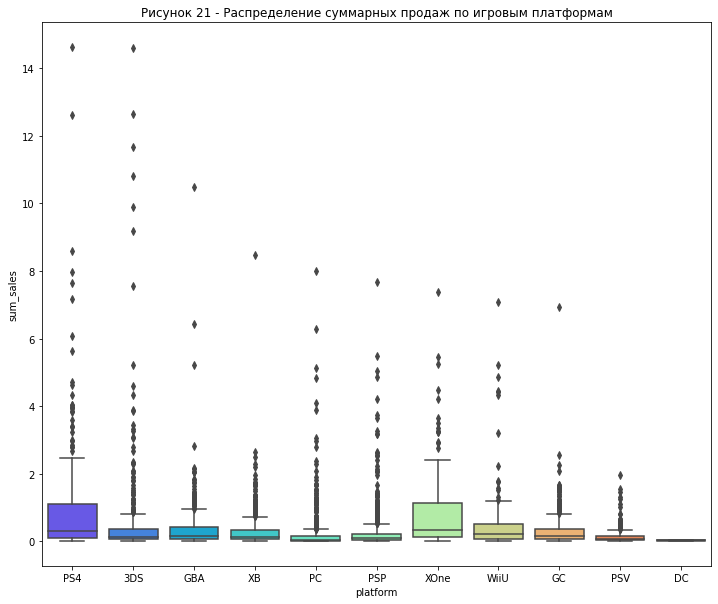

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot (x = 'platform', y = 'sum_sales', data = prognoz, palette='rainbow')
plt.title('Рисунок 21 - Распределение суммарных продаж по игровым платформам')

 Продажи XOne и PS4 сильно выделяются на фоне остальных, что неудивительно, потому что это лидеры рынка и приозводители сделали ставку имеено на них. 

### Разберемся как влияют оценки пользователей и критиков на продажи

In [20]:
corr = games[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')



,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1.000000,0.577140,0.266193,0.249969,0.133017
user_score,0.577140,1.000000,0.078695,0.051019,0.110179
na_sales,0.266193,0.078695,1.000000,0.793403,0.417326
eu_sales,0.249969,0.051019,0.793403,1.000000,0.467837
jp_sales,0.133017,0.110179,0.417326,0.467837,1.000000


Рисунок 21 - Матрица корреляции для игровых платформ

Линейная зависимость между оценками критиков и пользователей минимальна. Посмотрим что на графиках.

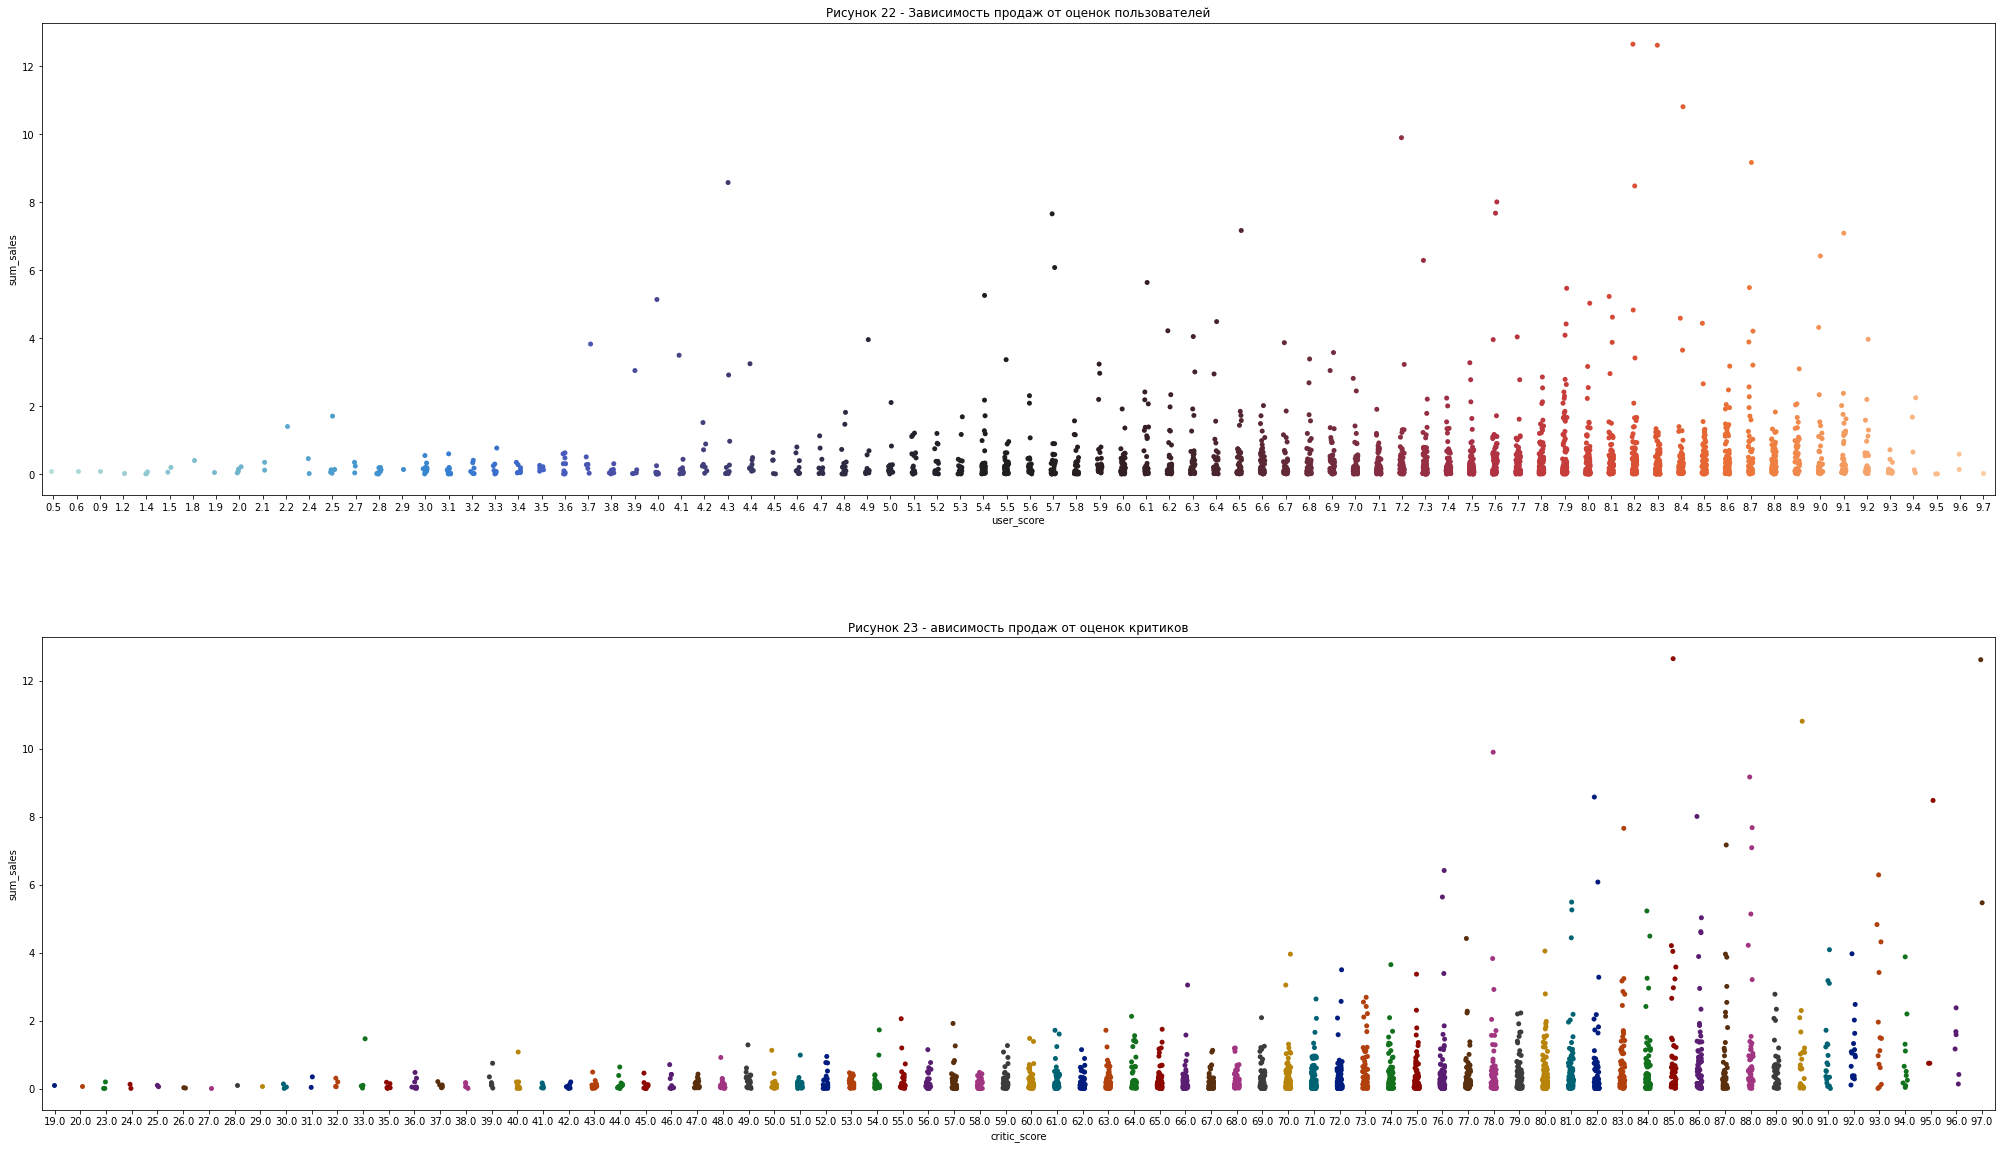

In [21]:
fig,ax = plt.subplots(2,1,figsize=(35,20))
ax1,ax2 = ax.flatten()
sns.stripplot(x = 'user_score', y = 'sum_sales', data = prognoz, jitter = True,palette='icefire',ax=ax1)
sns.stripplot(x = 'critic_score', y = 'sum_sales', data = prognoz, jitter = True,palette='dark',ax=ax2)
ax1.set_title('Рисунок 22 - Зависимость продаж от оценок пользователей')
ax2.set_title('Рисунок 23 - ависимость продаж от оценок критиков')
plt.subplots_adjust(wspace=0.3, hspace=0.3)


От оценок зависят продажи - чем выше тем больше, и не важно оценил игру пользователь или критик. А также самые дорогие продажи приходятся на самые высокие оценки критиков. В общем чем от критиков продажи очень даже зависят.Производителям необходимо поддерживать с ними хорошие отношения.

Text(0.5, 1.0, 'Рисунок 24 - Распределение продаж для различных платформ')

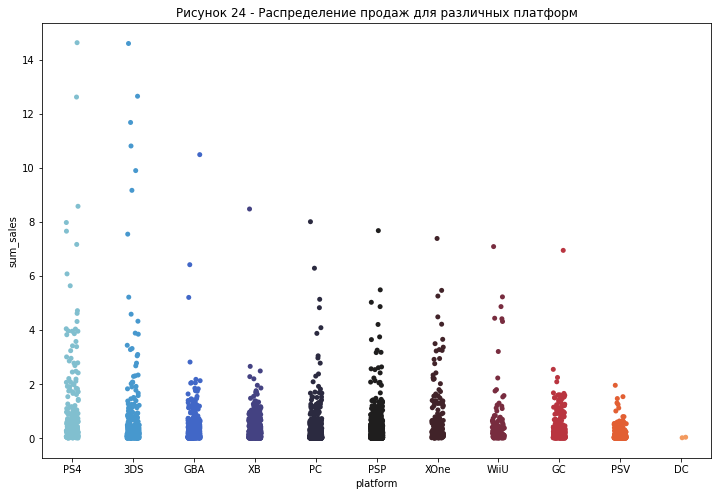

In [22]:
plt.figure(figsize=(12,8))

sns.stripplot(x = 'platform', y = 'sum_sales', data = prognoz, jitter = True,palette='icefire')
plt.title('Рисунок 24 - Распределение продаж для различных платформ')

Общие продажи игр распределены в диапазоне до 5. Это означает, что зарабатывают на играх для платформ в основном создатели платформ, а не разработчики игр для них. Но если вы разработчик, то можно сосредоточиться на работе с играми для PS4 и 3DS- это прибыльные сегменты рынка.

In [23]:
print(games.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head())
print(games.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).tail())

              sum_sales
genre                  
Action          1316.04
Sports           866.88
Shooter          794.37
Misc             668.18
Role-Playing     616.84
            sum_sales
genre                
Simulation     299.79
Fighting       244.15
Adventure      156.73
Puzzle         121.09
Strategy        92.36


Наиболее популярны игры жанров экшн, спорт, шутеры, аркады и ролевые игры, те игры, в которых получаешь эмоцию от происходящего. Наименее популярны игры, в которых нужно думать или совершать однотипные действия: симуляции, бои, приключения, пазлы и стратегии. Связано это еще и с ценой на игры, производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

# 4. Портрет пользователя каждого региона

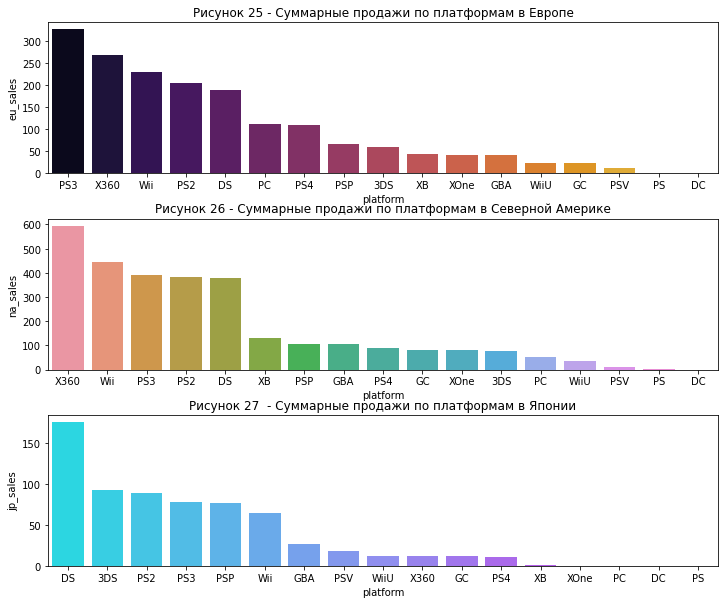

In [24]:
fig,ax = plt.subplots(3,1,figsize=(12,10))
ax1,ax2,ax3 = ax.flatten()

cnt=games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['eu_sales'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 25 - Суммарные продажи по платформам в Европе')

cnt=games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['na_sales'],ax=ax2)
ax2.set_title('Рисунок 26 - Суммарные продажи по платформам в Северной Америке')

cnt=games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['jp_sales'],palette= 'cool',ax=ax3)
ax3.set_title('Рисунок 27  - Суммарные продажи по платформам в Японии')
plt.subplots_adjust(wspace=0.3, hspace=0.3)



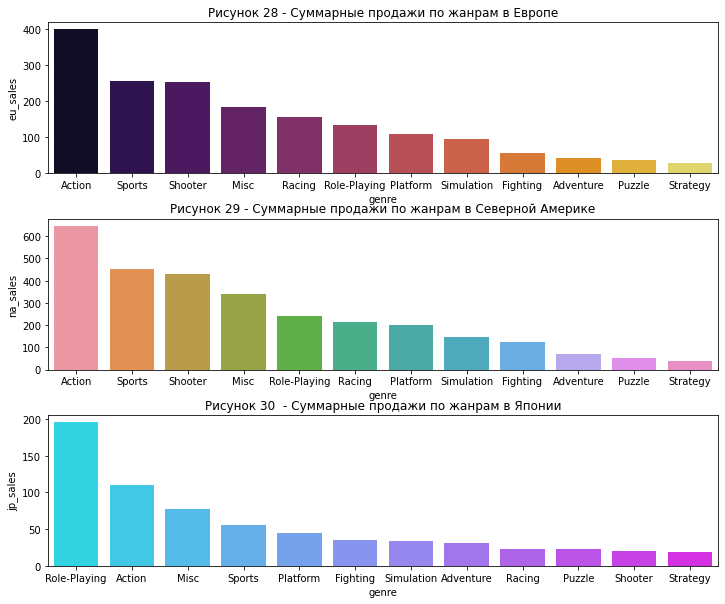

In [25]:
fig,ax = plt.subplots(3,1,figsize=(12,10))
ax1,ax2,ax3 = ax.flatten()

cnt=games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['eu_sales'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 28 - Суммарные продажи по жанрам в Европе')

cnt=games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['na_sales'],ax=ax2)
ax2.set_title('Рисунок 29 - Суммарные продажи по жанрам в Северной Америке')

cnt=games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['jp_sales'],palette= 'cool',ax=ax3)
ax3.set_title('Рисунок 30  - Суммарные продажи по жанрам в Японии')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

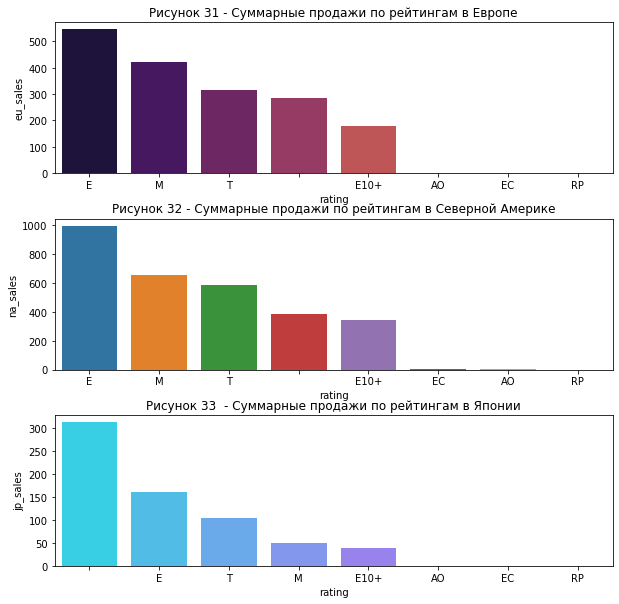

In [26]:
fig,ax = plt.subplots(3,1,figsize=(10,10))
ax1,ax2,ax3 = ax.flatten()

cnt=games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['eu_sales'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 31 - Суммарные продажи по рейтингам в Европе')

cnt=games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['na_sales'],ax=ax2)
ax2.set_title('Рисунок 32 - Суммарные продажи по рейтингам в Северной Америке')

cnt=games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)
sns.barplot(x = cnt.index,y=cnt['jp_sales'],palette= 'cool',ax=ax3)
ax3.set_title('Рисунок 33  - Суммарные продажи по рейтингам в Японии')
plt.subplots_adjust(wspace=0.3, hspace=0.3)

По итогу можно сказать, что жанры для игр в Северной Америке, Европе и Японии популярны одни и те же, а вот игровые платформы у японцев значительно отличаются. В разы различаются и продажи в этих регионах: больше всего продаж в Северной Америке, меньше всего в Японии.Видимо это связано с разным менталитетом. Зависимость от рейтинга отслеживается во всех трех регионах. 

Наиболее популярны игры с рейтингом "для всех", "подросткам","детям старше 10 лет" и "для взрослых"(в Европе и Северной Америке спрос на них выше, японцы больше предпочитают игры без определенного рейтинга).
Ситуация в Японии связана с тем, что получить возрастной рейтинг на японском рынке сложно и дорого. 
Начинается это с того, что всё общение и вся документация — на японском языке.

Есть 2 варианта для построения отношений:
* разовый платёж. Вы хотите единожды сделать рейтинг для одной игры и на одну (или несколько) платформу — стоило это на 2018 год примерно 2 тысячи евро.
* членство. У вас есть как вступительный взнос, так и взнос за каждую игру, но цена за оценку игры ниже, чем разовая оценка в первом варианте. То есть в перспективе, если вы планируйте делать 5-7 релизов и на 3-4 платформы, вам стоит рассмотреть и членство в данном агентстве.

# 5. Исследование статистических показателей

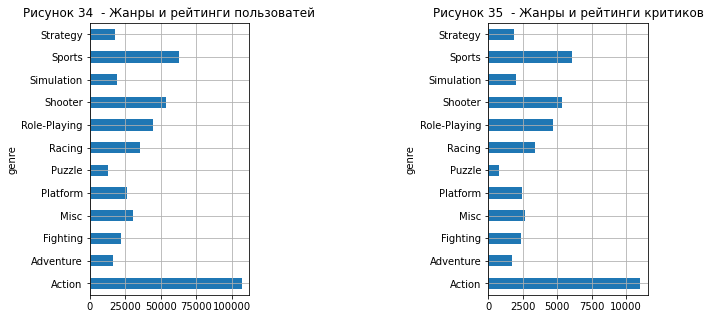

In [27]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax1,ax2 = ax.flatten()
games.groupby('genre')['critic_score'].sum().plot(grid=True, kind='barh',figsize=(10, 5),ax=ax1)
games.groupby('genre')['user_score'].sum().plot(grid=True, kind='barh',figsize=(10, 5),ax=ax2)
ax1.set_title('Рисунок 34  - Жанры и рейтинги пользоватей')
ax2.set_title('Рисунок 35  - Жанры и рейтинги критиков')

plt.subplots_adjust(wspace=1.5, hspace=0.3)



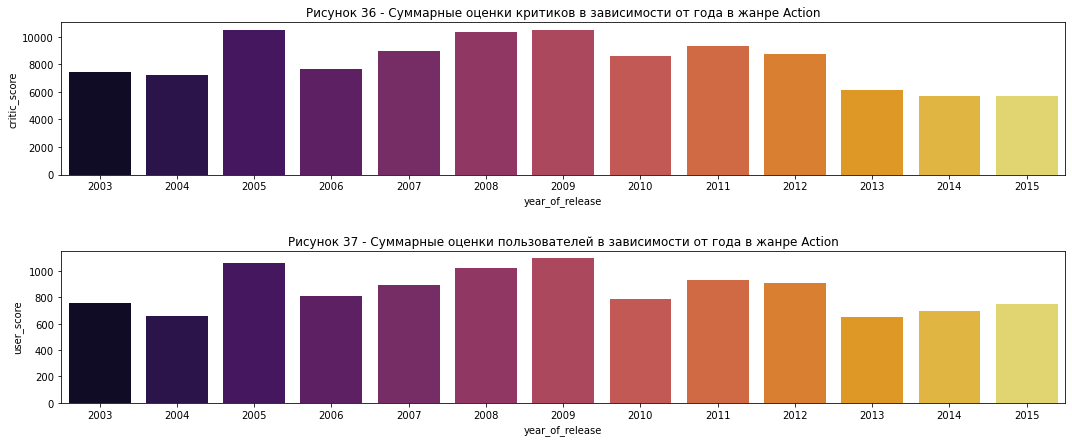

In [28]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Action"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'inferno',ax=ax1)
ax1.set_title('Рисунок 36 - Суммарные оценки критиков в зависимости от года в жанре Action')
cnt=games.query('genre=="Action"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'inferno',ax=ax2)
ax2.set_title('Рисунок 37 - Суммарные оценки пользователей в зависимости от года в жанре Action')

plt.subplots_adjust(wspace=0.3, hspace=0.5)


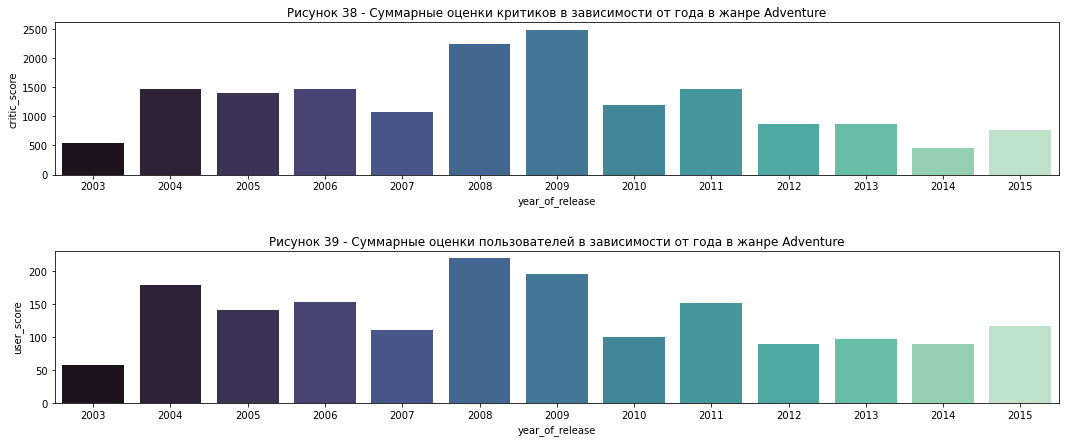

In [29]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Adventure"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'mako',ax=ax1)
ax1.set_title('Рисунок 38 - Суммарные оценки критиков в зависимости от года в жанре Adventure')
cnt=games.query('genre=="Adventure"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'mako',ax=ax2)
ax2.set_title('Рисунок 39 - Суммарные оценки пользователей в зависимости от года в жанре Adventure')

plt.subplots_adjust(wspace=0.3, hspace=0.5)


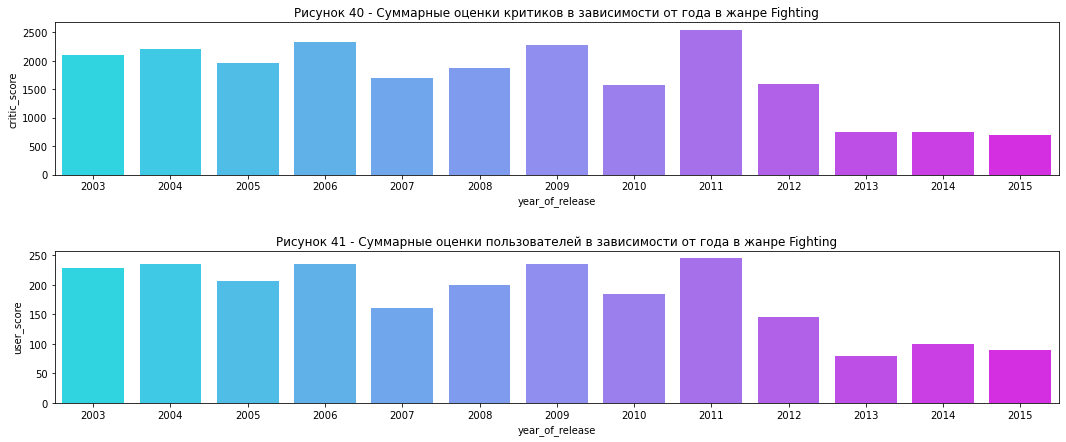

In [30]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Fighting"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 40 - Суммарные оценки критиков в зависимости от года в жанре Fighting')
cnt=games.query('genre=="Fighting"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'cool',ax=ax2)
ax2.set_title('Рисунок 41 - Суммарные оценки пользователей в зависимости от года в жанре Fighting')

plt.subplots_adjust(wspace=0.3, hspace=0.5)


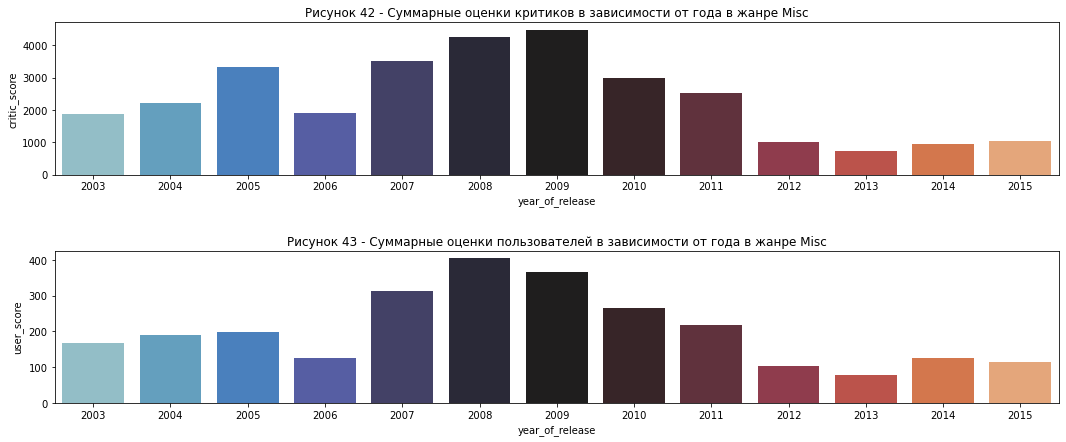

In [31]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Misc"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'icefire',ax=ax1)
ax1.set_title('Рисунок 42 - Суммарные оценки критиков в зависимости от года в жанре Misc')
cnt=games.query('genre=="Misc"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'icefire',ax=ax2)
ax2.set_title('Рисунок 43 - Суммарные оценки пользователей в зависимости от года в жанре Misc')

plt.subplots_adjust(wspace=0.3, hspace=0.5)


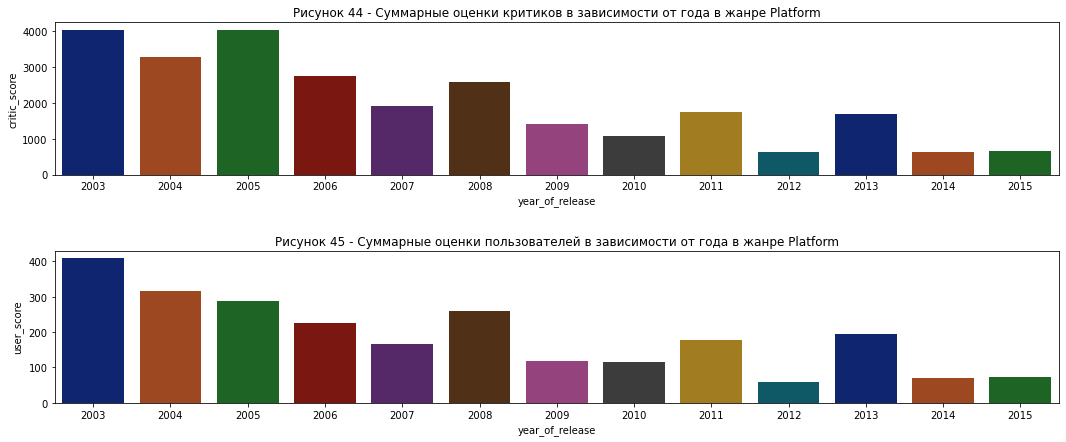

In [32]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Platform"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'dark',ax=ax1)
ax1.set_title('Рисунок 44 - Суммарные оценки критиков в зависимости от года в жанре Platform')
cnt=games.query('genre=="Platform"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'dark',ax=ax2)
ax2.set_title('Рисунок 45 - Суммарные оценки пользователей в зависимости от года в жанре Platform')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

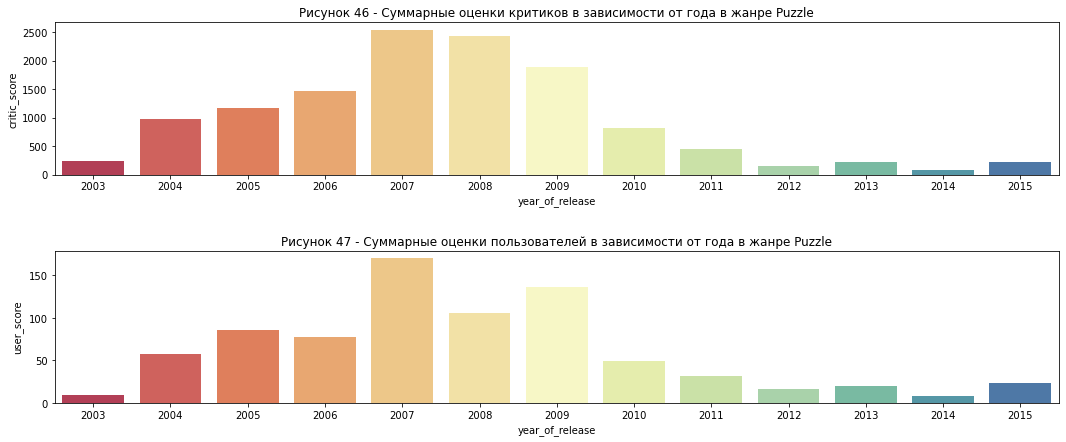

In [33]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Puzzle"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'Spectral',ax=ax1)
ax1.set_title('Рисунок 46 - Суммарные оценки критиков в зависимости от года в жанре Puzzle')
cnt=games.query('genre=="Puzzle"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'Spectral',ax=ax2)
ax2.set_title('Рисунок 47 - Суммарные оценки пользователей в зависимости от года в жанре Puzzle')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

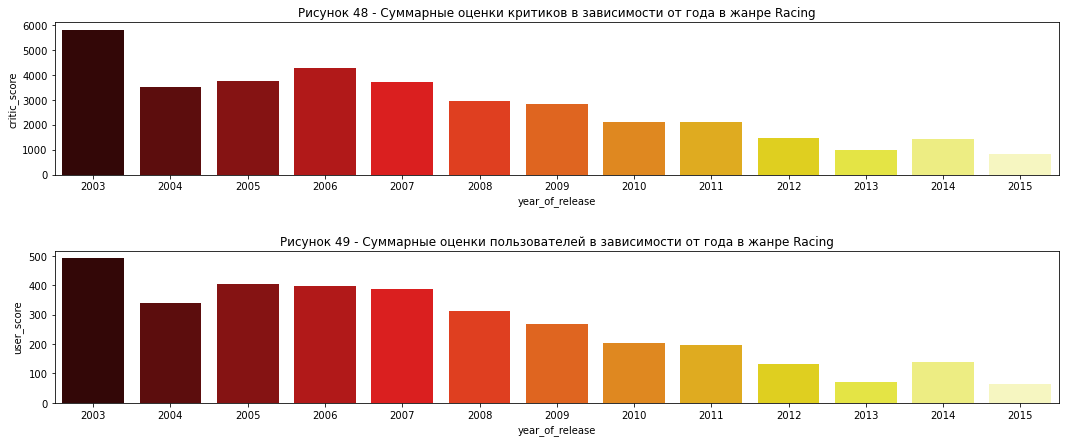

In [34]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Racing"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'hot',ax=ax1)
ax1.set_title('Рисунок 48 - Суммарные оценки критиков в зависимости от года в жанре Racing')
cnt=games.query('genre=="Racing"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'hot',ax=ax2)
ax2.set_title('Рисунок 49 - Суммарные оценки пользователей в зависимости от года в жанре Racing')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

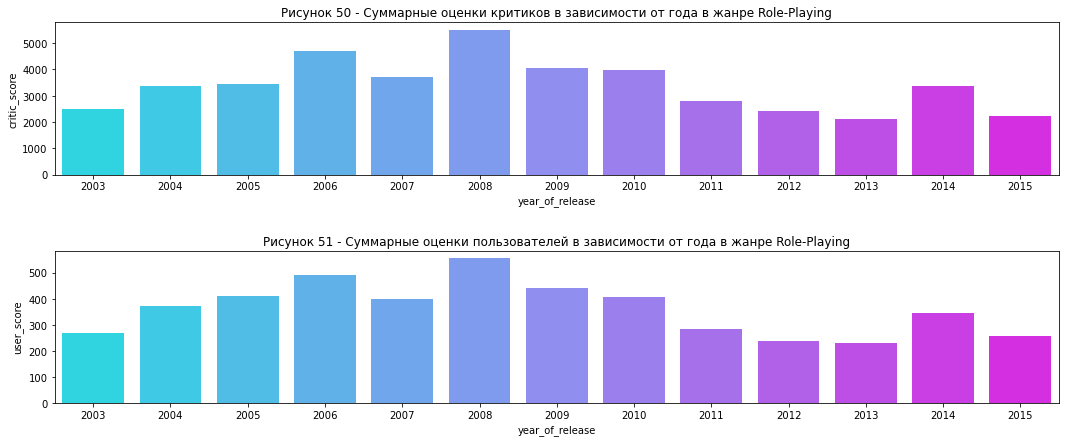

In [35]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Role-Playing"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'cool',ax=ax1)
ax1.set_title('Рисунок 50 - Суммарные оценки критиков в зависимости от года в жанре Role-Playing')
cnt=games.query('genre=="Role-Playing"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'cool',ax=ax2)
ax2.set_title('Рисунок 51 - Суммарные оценки пользователей в зависимости от года в жанре Role-Playing')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Shooter"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'cubehelix',ax=ax1)
ax1.set_title('Рисунок 52 - Суммарные оценки критиков в зависимости от года в жанре Shooter')
cnt=games.query('genre=="Shooter"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'cubehelix',ax=ax2)
ax2.set_title('Рисунок 53 - Суммарные оценки пользователей в зависимости от года в жанре Shooter')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Simulation"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'viridis',ax=ax1)
ax1.set_title('Рисунок 54 - Суммарные оценки критиков в зависимости от года в жанре Simulation')
cnt=games.query('genre=="Simulation"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'viridis',ax=ax2)
ax2.set_title('Рисунок 55 Суммарные оценки пользователей в зависимости от года в жанре Simulation')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Sports"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'magma',ax=ax1)
ax1.set_title('Рисунок 56 - Суммарные оценки критиков в зависимости от года в жанре Sports')
cnt=games.query('genre=="Sports"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'magma',ax=ax2)
ax2.set_title('Рисунок 57 - Суммарные оценки пользователей в зависимости от года в жанре Sports')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(18,7))
ax1,ax2= ax.flatten()

cnt=games.query('genre=="Strategy"').pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['critic_score'],palette= 'husl',ax=ax1)
ax1.set_title('Рисунок 58 - Суммарные оценки критиков в зависимости от года в жанре Strategy')
cnt=games.query('genre=="Strategy"').pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
sns.barplot(x = cnt.index,y=cnt['user_score'],palette= 'husl',ax=ax2)
ax2.set_title('Рисунок 59 - Суммарные оценки пользователей в зависимости от года в жанре Strategy')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

Теперь мы видим, что в большинстве жанров оценоки и у критиков, и у пользователей уменьшилось- такая тенденция пошла с 2007 года.Возможно, это связано с тем, что рынок платформенных игр уступил место играм на мобильных устройствах и ПК, за платформами  рост продаж остался только на стратегии и ролевые игры.

In [ ]:
corr = games[['critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='cool')

Видим, что оценка критиков и пользователей зависят на друг от друга на 57,7%. 
Эта корреляция действительна и для жанров.
Критики выше оценивают жанры, чем пользователи. 

In [ ]:
action_user = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
adventure_user = games[(games['genre'] == 'Adventure') & (games['user_score'] > 0)]['user_score']
fighting_user = games[(games['genre'] == 'Fighting') & (games['user_score'] > 0)]['user_score']
misc_user= games[(games['genre'] == 'Misc') & (games['user_score'] > 0)]['user_score']
platform_user= games[(games['genre'] == 'Platform') & (games['user_score'] > 0)]['user_score']
puzzle_user= games[(games['genre'] == 'Puzzle') & (games['user_score'] > 0)]['user_score']
role_playing_user= games[(games['genre'] == 'Role-Playing') & (games['user_score'] > 0)]['user_score']
shooter_user= games[(games['genre'] == 'Shooter') & (games['user_score'] > 0)]['user_score']
simulation_user= games[(games['genre'] == 'Simulation') & (games['user_score'] > 0)]['user_score']
sports_user= games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
strategy_user= games[(games['genre'] == 'Strategy') & (games['user_score'] > 0)]['user_score']

In [ ]:
action_critic = games[(games['genre'] == 'Action') & (games['critic_score'] > 0)]['critic_score']
adventure_critic = games[(games['genre'] == 'Adventure') & (games['critic_score'] > 0)]['critic_score']
fighting_critic = games[(games['genre'] == 'Fighting') & (games['critic_score'] > 0)]['critic_score']
misc_critic= games[(games['genre'] == 'Misc') & (games['critic_score'] > 0)]['critic_score']
platform_critic= games[(games['genre'] == 'Platform') & (games['critic_score'] > 0)]['critic_score']
puzzle_critic= games[(games['genre'] == 'Puzzle') & (games['critic_score'] > 0)]['critic_score']
role_playing_critic= games[(games['genre'] == 'Role-Playing') & (games['critic_score'] > 0)]['critic_score']
shooter_critic= games[(games['genre'] == 'Shooter') & (games['critic_score'] > 0)]['critic_score']
simulation_critic= games[(games['genre'] == 'Simulation') & (games['critic_score'] > 0)]['critic_score']
sports_critic= games[(games['genre'] == 'Sports') & (games['critic_score'] > 0)]['critic_score']
strategy_critic= games[(games['genre'] == 'Strategy') & (games['critic_score'] > 0)]['critic_score']

In [ ]:
print('Дисперсия пользовательских оценок Action: {:.2f}'.format(np.var(action_user)))
print('Дисперсия оценок критиков Action: {:.2f}'.format(np.var(action_critic)))
print('Среднее отклонение оценок пользователей Action: {:.2f}'.format(np.std(action_user)))
print('Среднее отклонение оценок критиков Action: {:.2f}'.format(np.std(action_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Adventure: {:.2f}'.format(np.var(adventure_user)))
print('Дисперсия оценок критиков Adventure: {:.2f}'.format(np.var(adventure_critic)))
print('Среднее отклонение оценок пользователей Adventure: {:.2f}'.format(np.std(adventure_user)))
print('Среднее отклонение оценок критиков Adventure: {:.2f}'.format(np.std(adventure_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Fighting: {:.2f}'.format(np.var(fighting_user)))
print('Дисперсия оценок критиков Fighting: {:.2f}'.format(np.var(fighting_critic)))
print('Среднее отклонение оценок пользователей Fighting: {:.2f}'.format(np.std(fighting_user)))
print('Среднее отклонение оценок критиков Fighting: {:.2f}'.format(np.std(fighting_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Misc: {:.2f}'.format(np.var(misc_user)))
print('Дисперсия оценок критиков Misc: {:.2f}'.format(np.var(misc_critic)))
print('Среднее отклонение оценок пользователей Misc: {:.2f}'.format(np.std(misc_user)))
print('Среднее отклонение оценок критиков Misc: {:.2f}'.format(np.std(misc_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Platform: {:.2f}'.format(np.var(platform_user)))
print('Дисперсия оценок критиков Platform: {:.2f}'.format(np.var(platform_critic)))
print('Среднее отклонение оценок пользователей Platform: {:.2f}'.format(np.std(platform_user)))
print('Среднее отклонение оценок критиков Platform: {:.2f}'.format(np.std(platform_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Puzzle: {:.2f}'.format(np.var(puzzle_user)))
print('Дисперсия оценок критиков Puzzle: {:.2f}'.format(np.var(puzzle_critic)))
print('Среднее отклонение оценок пользователей Puzzle: {:.2f}'.format(np.std(puzzle_user)))
print('Среднее отклонение оценок критиков Puzzle: {:.2f}'.format(np.std(puzzle_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Role-Playing: {:.2f}'.format(np.var(role_playing_user)))
print('Дисперсия оценок критиков Role-Playing: {:.2f}'.format(np.var(role_playing_critic)))
print('Среднее отклонение оценок пользователей Role-Playing: {:.2f}'.format(np.std(role_playing_user)))
print('Среднее отклонение оценок критиков Role-Playing: {:.2f}'.format(np.std(role_playing_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Shooter: {:.2f}'.format(np.var(shooter_user)))
print('Дисперсия оценок критиков Shooter: {:.2f}'.format(np.var(shooter_critic)))
print('Среднее отклонение оценок пользователей Shooter: {:.2f}'.format(np.std(shooter_user)))
print('Среднее отклонение оценок критиков Shooter: {:.2f}'.format(np.std(shooter_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Simulation: {:.2f}'.format(np.var(simulation_user)))
print('Дисперсия оценок критиков Simulation: {:.2f}'.format(np.var(simulation_critic)))
print('Среднее отклонение оценок пользователей Simulation: {:.2f}'.format(np.std(simulation_user)))
print('Среднее отклонение оценок критиков Simulation: {:.2f}'.format(np.std(simulation_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Sports: {:.2f}'.format(np.var(sports_user)))
print('Дисперсия оценок критиков Sports: {:.2f}'.format(np.var(sports_critic)))
print('Среднее отклонение оценок пользователей Sports: {:.2f}'.format(np.std(sports_user)))
print('Среднее отклонение оценок критиков Sports: {:.2f}'.format(np.std(sports_critic)))

In [ ]:
print('Дисперсия пользовательских оценок Strategy: {:.2f}'.format(np.var(strategy_user)))
print('Дисперсия оценок критиков Strategy: {:.2f}'.format(np.var(strategy_critic)))
print('Среднее отклонение оценок пользователей Strategy: {:.2f}'.format(np.std(strategy_user)))
print('Среднее отклонение оценок критиков Strategy: {:.2f}'.format(np.std(strategy_critic)))

Оценки критиков и пользователей для большинства жанров разбросаны равномерно. Пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.

In [ ]:
variance_user = np.var(games['user_score'])
print('Дисперсия пользовательских оценок: {:.2f}'.format(variance_user))
variance_critic = np.var(games['critic_score'])
print('Дисперсия оценок критиков: {:.2f}'.format(variance_critic)) 

In [ ]:
mean_value_user =  games['user_score'].mean()
mean_value_critic =  games['critic_score'].mean()
spacing_all_user = games['user_score']  - mean_value_user # для каждого элемента датасета находим расстояние от среднего значения
spacing_all_critic = games['critic_score']  - mean_value_critic
spacing_all_mean_user = spacing_all_user.mean()
spacing_all_mean_critic = spacing_all_critic.mean()
print('Среднее расстояние между пользовательскими оценками',spacing_all_mean_user)
print('Среднее расстояние между оценками критиков',spacing_all_mean_critic)#  считаем среднее расстояние


Улучшенная метрика разброса — не просто среднее расстояние между значениями датасета и средним, а средний квадрат этого расстояния. Эта величина называется дисперсия (лат. dispersio, «рассеяние»).Давайте определим ее для оценок пользователей и критиков:

In [ ]:
variance_user = np.var(games['user_score'])
print('Дисперсия пользовательских оценок: {:.2f}'.format(variance_user))
variance_critic = np.var(games['critic_score'])
print('Дисперсия оценок критиков: {:.2f}'.format(variance_critic)) 

In [ ]:
standart_dev_user=np.sqrt(variance_user)
print ('Стандартное отклонение пользовательских оценок: {:.2f}'.format(standart_dev_user))
standart_dev_critic=np.sqrt(variance_critic)
print ('Стандартное отклонение оценок критиков: {:.2f}'.format(standart_dev_critic))

Как видно из наших вычислений,пользовательские оценки и оценки критиков разбросаны равномерно для большинства жанров. Критики чаще ставят низкие оценки и оценивают жанры, которые пользователи считают непопулярными. Пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.

# 6. Проверка гипотез

In [ ]:
alpha = 0.05
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
if np.var(xbox)==np.var(pc):
    print('True')
else:
    print('False')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax1,ax2= ax.flatten()
sns.distplot(xbox,color='r',ax=ax1)
sns.distplot(pc,color='y',ax=ax2)
ax1.set_title('Рисунок 60 - Распределение рейтинга пользователей для XOne' )
ax2.set_title('Рисунок 61 - Распределение рейтинга пользователей для PC' )

plt.subplots_adjust(wspace=0.1, hspace=0.5)


Распределение Гауссовское, используем Т-критерий Стьюдента, дисперсия выборок не равна

H0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

H1. Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [ ]:
results = scipy.stats.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

H0. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

H1. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [ ]:
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
if np.var(action)==np.var(sports):
    print('True')
else:
    print('False')

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax1,ax2= ax.flatten()
sns.distplot(action,color='b',ax=ax1)
sns.distplot(sports,color='g',ax=ax2)
ax1.set_title('Рисунок 62 -Распределение рейтинга пользователей для жанра Action' )
ax2.set_title('Рисунок 63 -Распределение рейтинга пользователей для жанра Sports' )

plt.subplots_adjust(wspace=0.1, hspace=0.5)


###### Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна.

In [ ]:
results=scipy.stats.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

При проверке гипотез мы выяснили, что пользовательские рейтинги для платформ Xbox и PC различны. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») тоже различны.

# 7. Вывод

По результам анализа мы выяснили, что продажи игр для представленных игровых платформ теряют обороты, похоже игры ушли на мобильные устройства. При этом люди играть в приставки не перестали, поэтому не останавливаются и разработчики, хотя делают это уже более осмотрительно. 

Видим, что пятерка самых популярных платформ набрала свою популярность с начала 2000-х. Период от первых продаж до исчезнования продаж в среднем занимает 14 лет.

Период же для появления платформы и выхода из нее с 1980 до 2000 - меньше, чем для платформ с 2000 до 2016, и составляет 10,4 года.

Все текло и менялось -так платформа PS трансформировалась в PS2 и PS3. 
Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. 
SNES 95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB.

При анализе данных мы увидели, что нормально распределены данные за период с 2003 по 2015 год, их мы и использовали в дальнейшей работе. 

По результатам работы стало понятно, что потенциально прибыльны платформы PS4 и XOne. 
Похоже что производителям нужно развивать именно эти платформы.

Также мы выяснили, что от уровня оценки прямо пропорционально зависят продажи, и не важно оценил игру пользователь или критик. А также самые дорогие продажи приходятся на самые высокие оценки критиков. 
 
Что касается игровых жанров, то для игр в Северной Америке, Европе и Японии популярно одно и то же, но игровые платформы у японцев значительно отличаются. 

Сильно различаются и продажи в этих регионах - больше всего продаж в Северной Америке, меньше всего в Японии. 
Видимо это связано это с различиями в менталите у рассмотренных стран. 

Зависимость от рейтинга существует во всех трех регионах. 

Наиболее популярны игры с рейтингом "для всех", "подросткам","детям старше 10 лет"

и "для взрослых" (в Европе и Северной Америке спрос на них выше,
японцы больше предпочитают игры без определенного рейтинга).

Но мы знаем, что получить возрастной рейтинг на японском рынке сложно и дорого. 
При это есть несколько вариантов: 
- разовый платёж. Вы хотите единожды сделать рейтинг для одной игры и на одну (или несколько) платформу — стоило это на 2018 год примерно 2 тысячи евро. 
- членство. У вас есть как вступительный взнос, так и взнос за каждую игру, но цена за оценку игры ниже, чем разовая оценка в первом варианте. То есть в перспективе, если вы планируйте делать 5-7 релизов и на 3-4 платформы, этот вариант будет интереснее. 

В большинстве жанров оценки и у критиков, и у пользователей после 2007 года уменьшились. 
Возможно,это связано с тем, что  игры ушли на мобильные устройства и PC,  продажи росли только на стратегии и ролевые игры.

Также мы увидели, что оценки критиков и пользователей для большинства жанров разбросаны равномерно. 
При этом, пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.